In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#!wget -O collisions.csv https://opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv

In [3]:
df = pd.read_csv('Collisions.csv')

In [4]:
df.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.344896,47.717173,1,1003,1003,3503158,Matched,Block,NaN,AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,...,Dry,Daylight,Y,NaN,NaN,45,Vehicle - Pedalcyclist,15057,0,N
1,-122.376467,47.543774,2,56200,56200,1795087,Matched,Block,NaN,35TH AVE SW BETWEEN SW MORGAN ST AND SW HOLLY ST,...,Dry,Dark - Street Lights On,NaN,6015003.0,NaN,0,Vehicle going straight hits pedestrian,0,0,N
2,-122.360735,47.701487,3,327037,328537,E979380,Matched,Intersection,37122.0,3RD AVE NW AND NW 100TH ST,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
3,-122.297415,47.599233,4,327278,328778,E996362,Unmatched,Intersection,30602.0,M L KING JR WAY S AND S JACKSON ST,...,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N
4,-122.368001,47.653585,5,1248,1248,3645424,Unmatched,Block,NaN,W EWING ST BETWEEN 6TH AVE W AND W EWING PL,...,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N


In [5]:
dfCollisions = df

In [6]:
dfCollisions.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.344896,47.717173,1,1003,1003,3503158,Matched,Block,NaN,AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,...,Dry,Daylight,Y,NaN,NaN,45,Vehicle - Pedalcyclist,15057,0,N
1,-122.376467,47.543774,2,56200,56200,1795087,Matched,Block,NaN,35TH AVE SW BETWEEN SW MORGAN ST AND SW HOLLY ST,...,Dry,Dark - Street Lights On,NaN,6015003.0,NaN,0,Vehicle going straight hits pedestrian,0,0,N
2,-122.360735,47.701487,3,327037,328537,E979380,Matched,Intersection,37122.0,3RD AVE NW AND NW 100TH ST,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
3,-122.297415,47.599233,4,327278,328778,E996362,Unmatched,Intersection,30602.0,M L KING JR WAY S AND S JACKSON ST,...,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N
4,-122.368001,47.653585,5,1248,1248,3645424,Unmatched,Block,NaN,W EWING ST BETWEEN 6TH AVE W AND W EWING PL,...,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N


In [7]:
dfCollisions['SEVERITYCODE'].value_counts()

1     137671
2      58783
0      21615
2b      3105
3        350
Name: SEVERITYCODE, dtype: int64

In [8]:
dfCollisions['ROADCOND'].value_counts()

Dry               128588
Wet                48734
Unknown            15139
Ice                 1232
Snow/Slush          1014
Other                136
Standing Water       119
Sand/Mud/Dirt         77
Oil                   64
Name: ROADCOND, dtype: int64

In [9]:
dfCollisions['LIGHTCOND'].value_counts()

Daylight                    119492
Dark - Street Lights On      50133
Unknown                      13532
Dusk                          6082
Dawn                          2609
Dark - No Street Lights       1579
Dark - Street Lights Off      1239
Other                          244
Dark - Unknown Lighting         23
Name: LIGHTCOND, dtype: int64

In [10]:
dfCollisions['WEATHER'].value_counts()

Clear                       114738
Raining                      34036
Overcast                     28552
Unknown                      15131
Snowing                        919
Other                          860
Fog/Smog/Smoke                 577
Sleet/Hail/Freezing Rain       116
Blowing Sand/Dirt               56
Severe Crosswind                26
Partly Cloudy                   10
Blowing Snow                     1
Name: WEATHER, dtype: int64

<h1>Pre Processing</h1>

In [11]:
dfSeattle = dfCollisions[['SEVERITYCODE','WEATHER','ROADCOND','LIGHTCOND']]

In [12]:
dfSeattle.count()

SEVERITYCODE    221524
WEATHER         195022
ROADCOND        195103
LIGHTCOND       194933
dtype: int64

In [13]:
dfSeattleCollisions = dfSeattle

In [14]:
dfSeattleCollisions.count()

SEVERITYCODE    221524
WEATHER         195022
ROADCOND        195103
LIGHTCOND       194933
dtype: int64

<h2>Dropping rows with empty values</h2>

In [15]:
dfSeattleCollisions.isna().sum()

SEVERITYCODE        1
WEATHER         26503
ROADCOND        26422
LIGHTCOND       26592
dtype: int64

In [16]:
#drop rows with empty values
dfSeattleCollisions.dropna(subset=["SEVERITYCODE"], axis=0, inplace=True)
dfSeattleCollisions.dropna(subset=["WEATHER"], axis=0, inplace=True)
dfSeattleCollisions.dropna(subset=["ROADCOND"], axis=0, inplace=True)
dfSeattleCollisions.dropna(subset=["LIGHTCOND"], axis=0, inplace=True)

In [17]:
dfSeattleCollisions.isna().sum()

SEVERITYCODE    0
WEATHER         0
ROADCOND        0
LIGHTCOND       0
dtype: int64

<h2>Drop rows with 'Unknown' values</h2>

In [18]:
#drop rows with Unknown values
dfSeattleCollisions.drop(dfSeattleCollisions[dfSeattleCollisions.WEATHER == 'Unknown'].index, inplace=True)
dfSeattleCollisions.drop(dfSeattleCollisions[dfSeattleCollisions.ROADCOND == 'Unknown'].index, inplace=True)
dfSeattleCollisions.drop(dfSeattleCollisions[dfSeattleCollisions.LIGHTCOND == 'Unknown'].index, inplace=True)

<h2>Drop rows with 'Other' values</h2>

In [19]:
#drop rows with Other values
dfSeattleCollisions.drop(dfSeattleCollisions[dfSeattleCollisions.WEATHER == 'Other'].index, inplace=True)
dfSeattleCollisions.drop(dfSeattleCollisions[dfSeattleCollisions.ROADCOND == 'Other'].index, inplace=True)
dfSeattleCollisions.drop(dfSeattleCollisions[dfSeattleCollisions.LIGHTCOND == 'Other'].index, inplace=True)

<h2>Drop rows with 0 values</h2>

In [20]:
dfSeattleCollisions.drop(dfSeattleCollisions[dfSeattleCollisions.SEVERITYCODE == '0'].index, inplace=True)

In [21]:
#reset the index values for the table
dfSeattleCollisions.reset_index(drop=True, inplace=True)

In [22]:
dfSeattleCollisions.count()

SEVERITYCODE    175244
WEATHER         175244
ROADCOND        175244
LIGHTCOND       175244
dtype: int64

In [23]:
dfSeattleCollisions['SEVERITYCODE'].value_counts()

1     115548
2      56378
2b      2985
3        333
Name: SEVERITYCODE, dtype: int64

In [24]:
dfSeattleCollisions['WEATHER'].value_counts()

Clear                       112379
Raining                      33527
Overcast                     27748
Snowing                        837
Fog/Smog/Smoke                 561
Sleet/Hail/Freezing Rain       110
Blowing Sand/Dirt               46
Severe Crosswind                26
Partly Cloudy                   10
Name: WEATHER, dtype: int64

<h2>Remap personal injury values</h2>

In [25]:
dfSeattleCollisions.SEVERITYCODE[dfSeattleCollisions.SEVERITYCODE == '2b'] = 2
dfSeattleCollisions.SEVERITYCODE[dfSeattleCollisions.SEVERITYCODE == '3'] = 2

In [26]:
dfSeattleCollisions['SEVERITYCODE'].value_counts()

1    115548
2     56378
2      3318
Name: SEVERITYCODE, dtype: int64

In [27]:
dfSeattleCollisions['SEVERITYCODE'] = dfSeattleCollisions['SEVERITYCODE'].astype('int64')

In [28]:
dfSeattleCollisions['SEVERITYCODE'].value_counts()

1    115548
2     59696
Name: SEVERITYCODE, dtype: int64

<h2>One Hot Encoding</h2>

In [29]:
#remap the values in weather
dfSeattleCollisions = pd.concat([dfSeattleCollisions,pd.get_dummies(df['WEATHER'])], axis=1)
dfSeattleCollisions.drop(['WEATHER'], axis = 1,inplace=True)
dfSeattleCollisions.drop(['Unknown'], axis = 1,inplace=True)
dfSeattleCollisions.drop(['Other'], axis = 1,inplace=True)
dfSeattleCollisions.dropna(subset=["SEVERITYCODE"], axis=0, inplace=True)

In [30]:
dfSeattleCollisions.head()

,SEVERITYCODE,ROADCOND,LIGHTCOND,Blowing Sand/Dirt,Blowing Snow,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing
0,2.0,Dry,Daylight,0,0,1,0,0,0,0,0,0,0
1,2.0,Dry,Dark - Street Lights On,0,0,0,0,1,0,0,0,0,0
2,1.0,Wet,Daylight,0,0,0,0,1,0,0,0,0,0
3,2.0,Dry,Daylight,0,0,0,0,0,0,0,0,0,0
4,1.0,Dry,Daylight,0,0,0,0,0,0,0,0,0,0


In [31]:
dfSeattleCollisions['ROADCOND'].value_counts()

Dry               125506
Wet                47557
Ice                 1103
Snow/Slush           842
Standing Water       109
Sand/Mud/Dirt         67
Oil                   60
Name: ROADCOND, dtype: int64

In [32]:
#remap the values in road condition
dfSeattleCollisions = pd.concat([dfSeattleCollisions,pd.get_dummies(df['ROADCOND'])], axis=1)
dfSeattleCollisions.drop(['ROADCOND'], axis = 1,inplace=True)
dfSeattleCollisions.drop(['Unknown'], axis = 1,inplace=True)
dfSeattleCollisions.drop(['Other'], axis = 1,inplace=True)
dfSeattleCollisions.dropna(subset=["SEVERITYCODE"], axis=0, inplace=True)

In [33]:
dfSeattleCollisions.head()

,SEVERITYCODE,LIGHTCOND,Blowing Sand/Dirt,Blowing Snow,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Dry,Ice,Oil,Sand/Mud/Dirt,Snow/Slush,Standing Water,Wet
0,2.0,Daylight,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0
1,2.0,Dark - Street Lights On,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0
2,1.0,Daylight,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1
3,2.0,Daylight,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
4,1.0,Daylight,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0


In [34]:
dfSeattleCollisions['LIGHTCOND'].value_counts()

Daylight                    115935
Dark - Street Lights On      48349
Dusk                          5823
Dawn                          2517
Dark - No Street Lights       1450
Dark - Street Lights Off      1153
Dark - Unknown Lighting         17
Name: LIGHTCOND, dtype: int64

In [35]:
#remap the values in light conditions
dfSeattleCollisions = pd.concat([dfSeattleCollisions,pd.get_dummies(df['LIGHTCOND'])], axis=1)
dfSeattleCollisions.drop(['LIGHTCOND'], axis = 1,inplace=True)
dfSeattleCollisions.drop(['Unknown'], axis = 1,inplace=True)
dfSeattleCollisions.drop(['Other'], axis = 1,inplace=True)
dfSeattleCollisions.dropna(subset=["SEVERITYCODE"], axis=0, inplace=True)

In [36]:
dfSeattleCollisions.head()

,SEVERITYCODE,Blowing Sand/Dirt,Blowing Snow,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,...,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk
0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,1,0
1,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,1,0,0,0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0,0,0,0,0,1,0
3,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [37]:
dfSeattleCollisions.count()

SEVERITYCODE                175244
Blowing Sand/Dirt           175244
Blowing Snow                175244
Clear                       175244
Fog/Smog/Smoke              175244
Overcast                    175244
Partly Cloudy               175244
Raining                     175244
Severe Crosswind            175244
Sleet/Hail/Freezing Rain    175244
Snowing                     175244
Dry                         175244
Ice                         175244
Oil                         175244
Sand/Mud/Dirt               175244
Snow/Slush                  175244
Standing Water              175244
Wet                         175244
Dark - No Street Lights     175244
Dark - Street Lights Off    175244
Dark - Street Lights On     175244
Dark - Unknown Lighting     175244
Dawn                        175244
Daylight                    175244
Dusk                        175244
dtype: int64

In [38]:
dfSeattleCollisions.tail()

,SEVERITYCODE,Blowing Sand/Dirt,Blowing Snow,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,...,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk
175239,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,1,0
175240,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,1,0
175241,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,1,0
175242,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0,0,0,0,0,1,0
175243,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,1,0


In [39]:
dfSeattleCollisions.head()

,SEVERITYCODE,Blowing Sand/Dirt,Blowing Snow,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,...,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk
0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,1,0
1,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,1,0,0,0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0,0,0,0,0,1,0
3,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


<h1>Normalizing</h1>

In [40]:
y = dfSeattleCollisions['SEVERITYCODE'].values.astype('int')

In [41]:
y[0:5]

array([2, 2, 1, 2, 1])

In [42]:
dfSeattleCollisions.drop(['SEVERITYCODE'], axis = 1,inplace=True)
X= dfSeattleCollisions

In [43]:
X[0:5]

,Blowing Sand/Dirt,Blowing Snow,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,...,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,1,0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,1,0,0,0,0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0,0,0,0,0,1,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [44]:
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [45]:
X= preprocessing.StandardScaler().fit(X).transform(X)

In [46]:
X[0:5]

array([[-1.41336983e-02,  0.00000000e+00,  9.59911322e-01,
        -5.06825745e-02, -3.90003146e-01,  0.00000000e+00,
        -4.29960061e-01, -9.55560611e-03, -2.35333913e-02,
        -6.38257642e-02,  8.40832723e-01, -7.79356588e-02,
        -1.70618733e-02, -1.94102972e-02, -6.84811494e-02,
        -2.37749015e-02, -5.34742090e-01, -8.39704427e-02,
        -7.65149142e-02, -5.47230224e-01, -2.38879928e-03,
        -1.07036612e-01,  9.14538667e-01, -1.69496570e-01],
       [-1.41336983e-02,  0.00000000e+00, -1.04176290e+00,
        -5.06825745e-02,  2.56408188e+00,  0.00000000e+00,
        -4.29960061e-01, -9.55560611e-03, -2.35333913e-02,
        -6.38257642e-02,  8.40832723e-01, -7.79356588e-02,
        -1.70618733e-02, -1.94102972e-02, -6.84811494e-02,
        -2.37749015e-02, -5.34742090e-01, -8.39704427e-02,
        -7.65149142e-02,  1.82738445e+00, -2.38879928e-03,
        -1.07036612e-01, -1.09344748e+00, -1.69496570e-01],
       [-1.41336983e-02,  0.00000000e+00, -1.04176290e

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [48]:
!conda install -c anaconda seaborn -y
import seaborn as sns

Solving environment: ...working... done

# All requested packages already installed.



<h1>K Nearest Neighbor</h1>

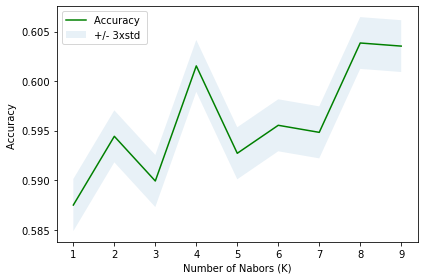

In [49]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

ConfustionMx = [];

for n in range(1,Ks):
    
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [50]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.6038403378127764 with k= 8


In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           1       0.66      0.82      0.73     23128
           2       0.35      0.19      0.24     11921

    accuracy                           0.60     35049
   macro avg       0.50      0.50      0.49     35049
weighted avg       0.55      0.60      0.57     35049



<h1>Decision Tree</h1>

In [52]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dTree.fit(X_train,y_train)
predTree = dTree.predict(X_test)
print (predTree [0:5])
print (y_test [0:5])

[1 1 1 1 1]
[1 2 1 2 1]


In [53]:
!pip install graphviz
!pip install pydotplus
!pip install --upgrade mglearn

!conda install -c anaconda graphviz -y     
!conda install -c anaconda pydotplus -y    

import os     
os.environ["PATH"] += os.pathsep + 'C:\\Users\\charl\\anaconda3\\Library\\bin\\graphviz'

from six import StringIO
#from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 


Requirement already up-to-date: mglearn in c:\users\charl\anaconda3\lib\site-packages (0.1.9)
Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



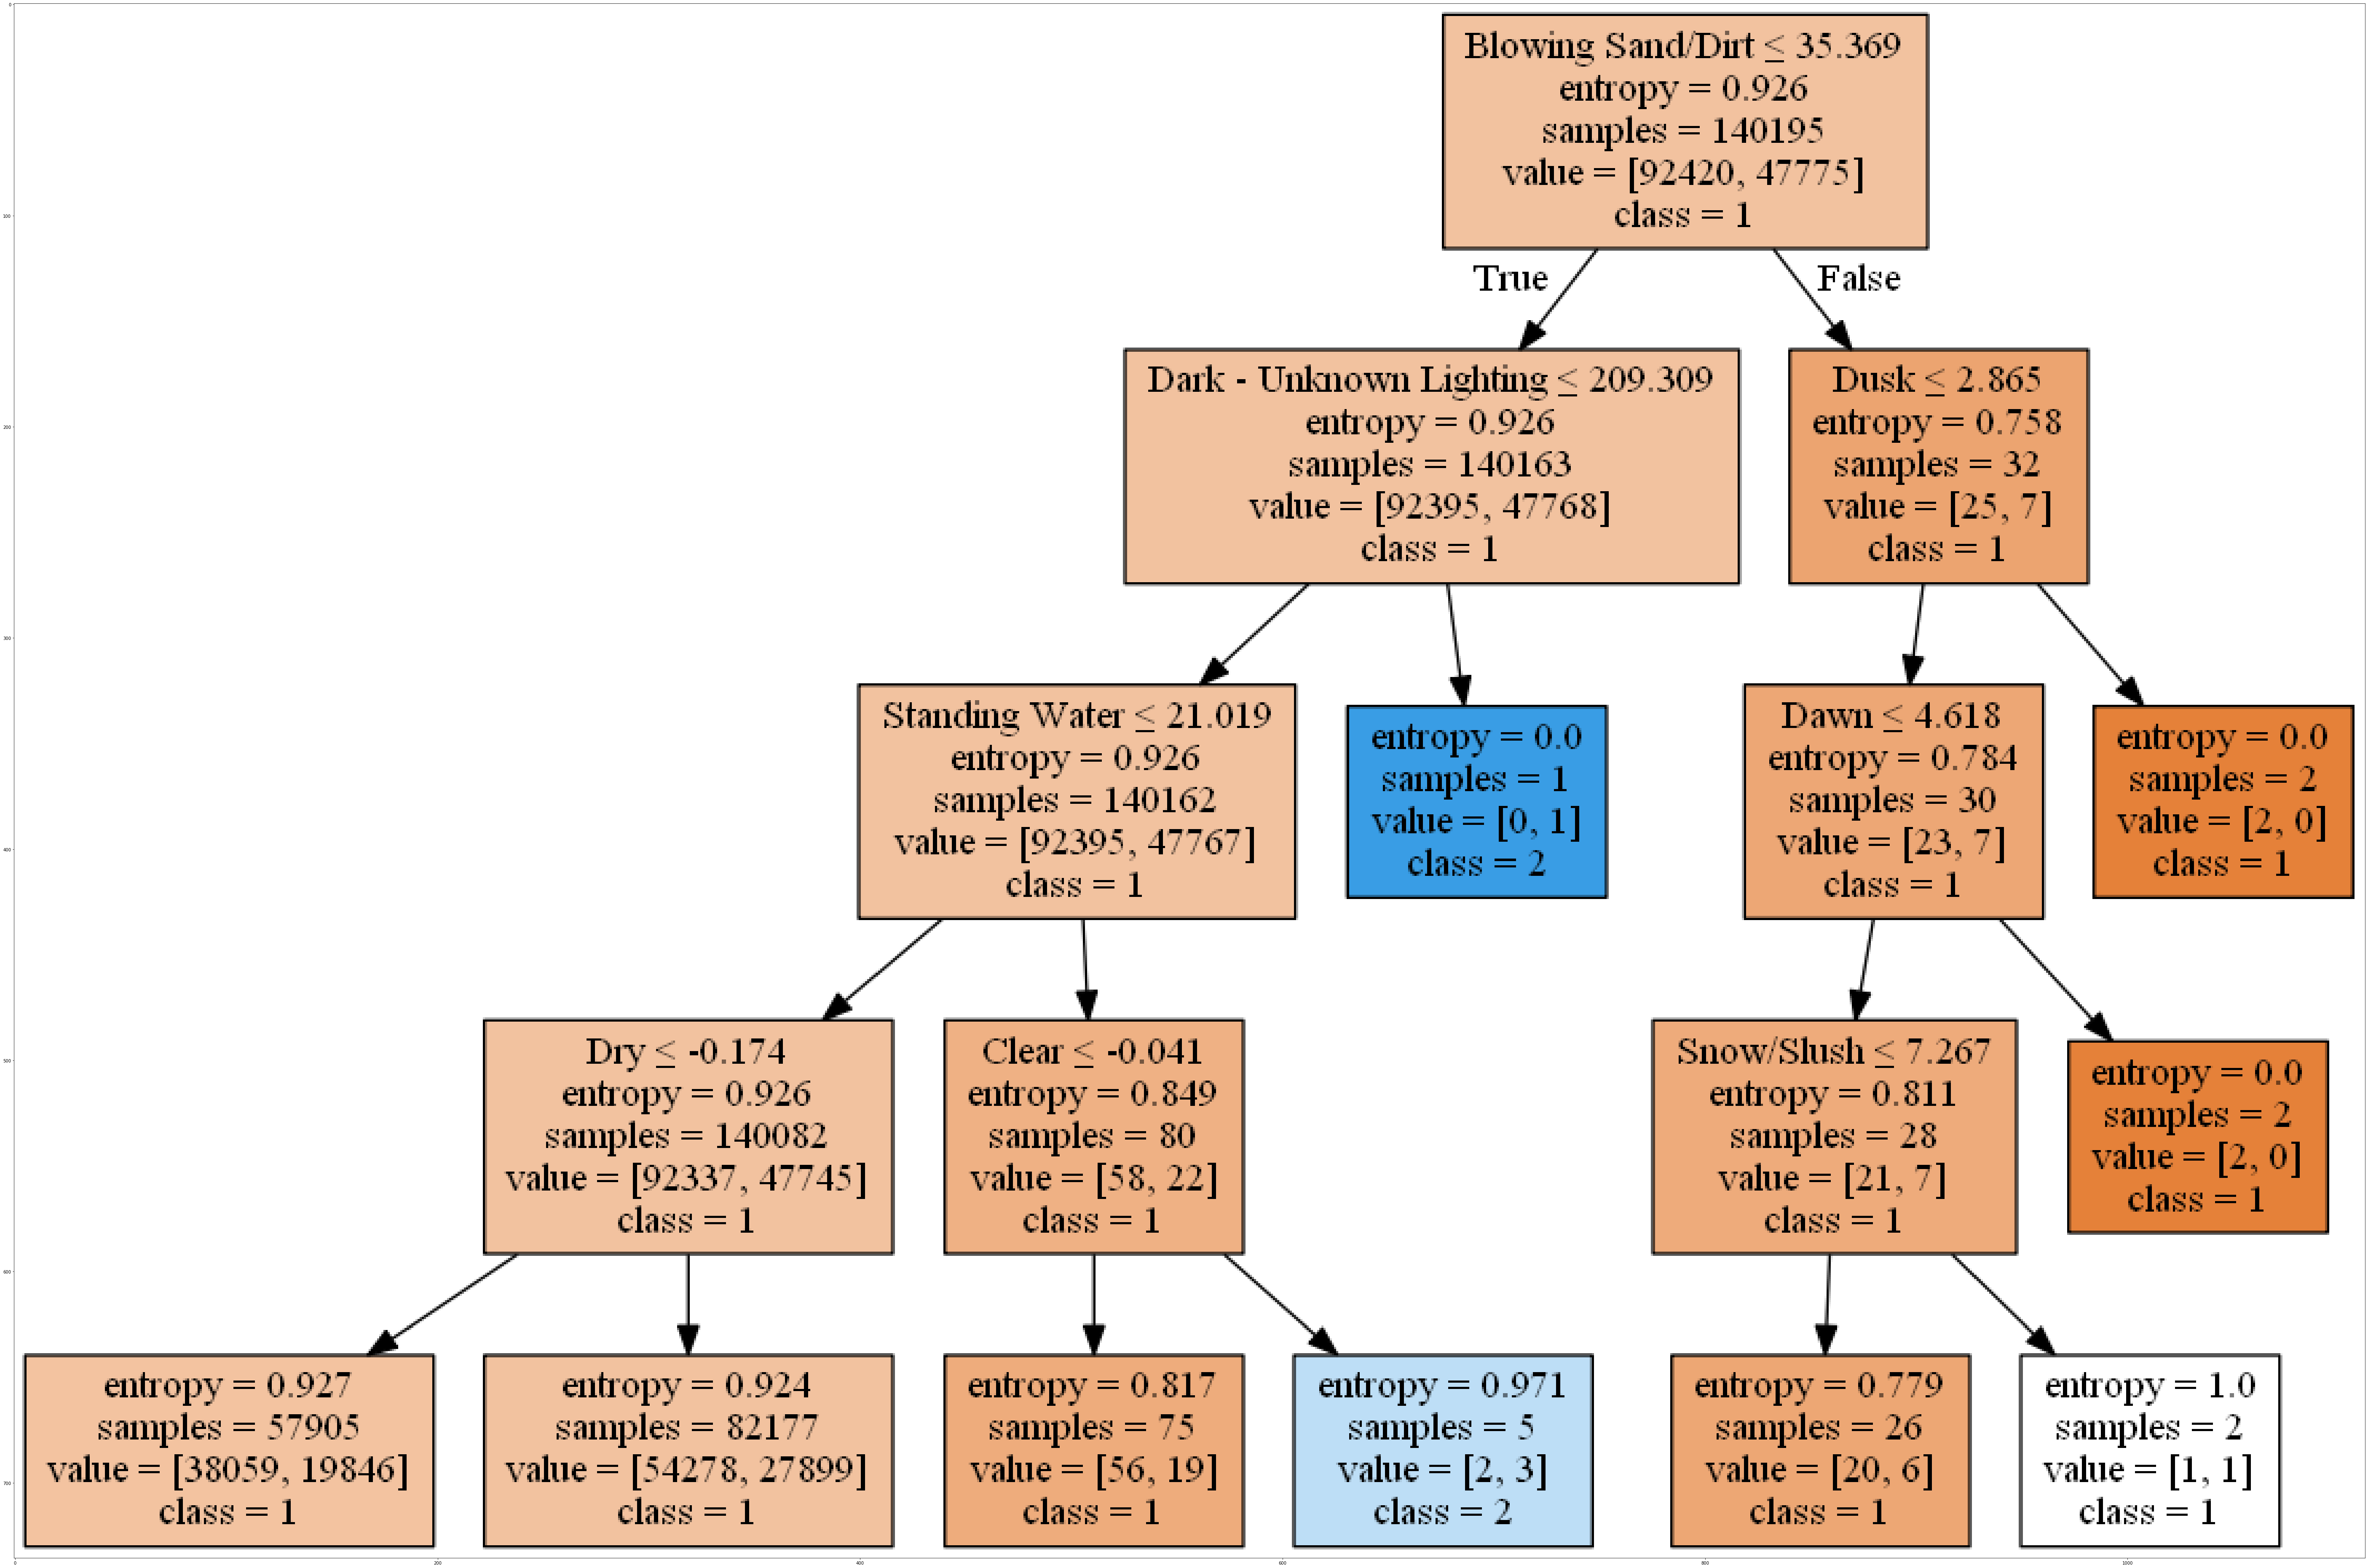

In [54]:
dot_data = StringIO()
filename = "dTree.png"
featureNames = dfSeattleCollisions.columns

y_trainNames = y_train
y_trainNames = y_trainNames.astype('str')
out=tree.export_graphviz(dTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainNames), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [55]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.6599047048417929


In [56]:
print(classification_report(y_test,predTree))

              precision    recall  f1-score   support

           1       0.66      1.00      0.80     23128
           2       1.00      0.00      0.00     11921

    accuracy                           0.66     35049
   macro avg       0.83      0.50      0.40     35049
weighted avg       0.78      0.66      0.52     35049



<h1>Support Vector Machine</h1>

In [57]:
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn import svm

clf = svm.SVC(kernel="sigmoid", gamma="auto")
clf.fit(X_train, y_train)

SVC(gamma='auto', kernel='sigmoid')

In [58]:
yhat = clf.predict(X_test)

In [59]:
from sklearn.metrics import f1_score
f1_score(y_test,yhat, average="weighted")

0.5622454259818991

In [60]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           1       0.66      0.83      0.73     23128
           2       0.34      0.17      0.23     11921

    accuracy                           0.60     35049
   macro avg       0.50      0.50      0.48     35049
weighted avg       0.55      0.60      0.56     35049



<h1>Logistic Regression</h1>

In [61]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver="liblinear").fit(X_train,y_train)

In [62]:
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

In [63]:
from sklearn.metrics import jaccard_score

In [64]:
jaccard_score(y_test,yhat,average=None)

array([0.65987617, 0.        ])

In [65]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           1       0.66      1.00      0.80     23128
           2       0.00      0.00      0.00     11921

    accuracy                           0.66     35049
   macro avg       0.33      0.50      0.40     35049
weighted avg       0.44      0.66      0.52     35049

